# **Airquality Index Prediction- Linear Regression Model**

###Introduction
I have exctracted  historical weather data from the "https://en.tutiempo.net/climate/ws-432950.html" this website from 2010 to 2018. Also, this dataset contain eight independent variables and one dependent variables which are

**T:** Average annual temperature

**TM:** Annual average maximum temperature

**Tm:** Average annual minimum temperature

**PP:** Rain or snow precipitation total annual
V:Annual average wind speed

**RA:** Number of days with rain

**SN:** Number of days with snow

**TS:** Number of days with storm

**FG:** Number of foggy days

**TN:** Number of days with tornado

**GR:** Number of days with hail and PM 2.5


### **Import the dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
## Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Read the dataset
url='/content/drive/MyDrive/Google_colab_project/Real_Combine.csv'
df=pd.read_csv(url)

In [4]:
#read the data
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1093 non-null   float64
 1   TM      1093 non-null   float64
 2   Tm      1093 non-null   float64
 3   SLP     1093 non-null   float64
 4   H       1093 non-null   float64
 5   VV      1093 non-null   float64
 6   V       1093 non-null   float64
 7   VM      1093 non-null   float64
 8   PM 2.5  1092 non-null   float64
dtypes: float64(9)
memory usage: 77.0 KB


In [6]:
# data describtion
df.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1092.000000
mean,26.009241,32.482251,19.460201,1008.081885,62.918573,2.003111,6.751510,15.805124,109.090984
std,7.237401,6.679078,7.438653,7.529237,15.709816,0.747541,3.841137,7.308435,84.465790
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,19.300000,27.800000,12.100000,1001.100000,54.000000,1.600000,3.700000,11.100000,41.833333
50%,28.200000,34.200000,21.200000,1008.100000,64.000000,1.900000,6.500000,14.800000,83.458333
75%,31.700000,37.000000,26.000000,1015.000000,74.000000,2.600000,9.100000,18.300000,158.291667
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


In [ ]:
#Check the null values
df.isna().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

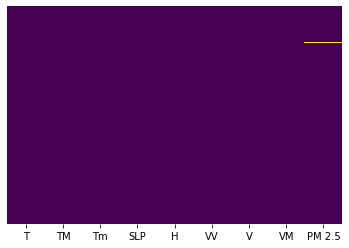

In [ ]:
#Ploting null values heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# Describe the data
df.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1092.000000
mean,26.009241,32.482251,19.460201,1008.081885,62.918573,2.003111,6.751510,15.805124,109.090984
std,7.237401,6.679078,7.438653,7.529237,15.709816,0.747541,3.841137,7.308435,84.465790
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,19.300000,27.800000,12.100000,1001.100000,54.000000,1.600000,3.700000,11.100000,41.833333
50%,28.200000,34.200000,21.200000,1008.100000,64.000000,1.900000,6.500000,14.800000,83.458333
75%,31.700000,37.000000,26.000000,1015.000000,74.000000,2.600000,9.100000,18.300000,158.291667
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


In [7]:
#Drop the Non-Values 
df=df.dropna(axis=0)

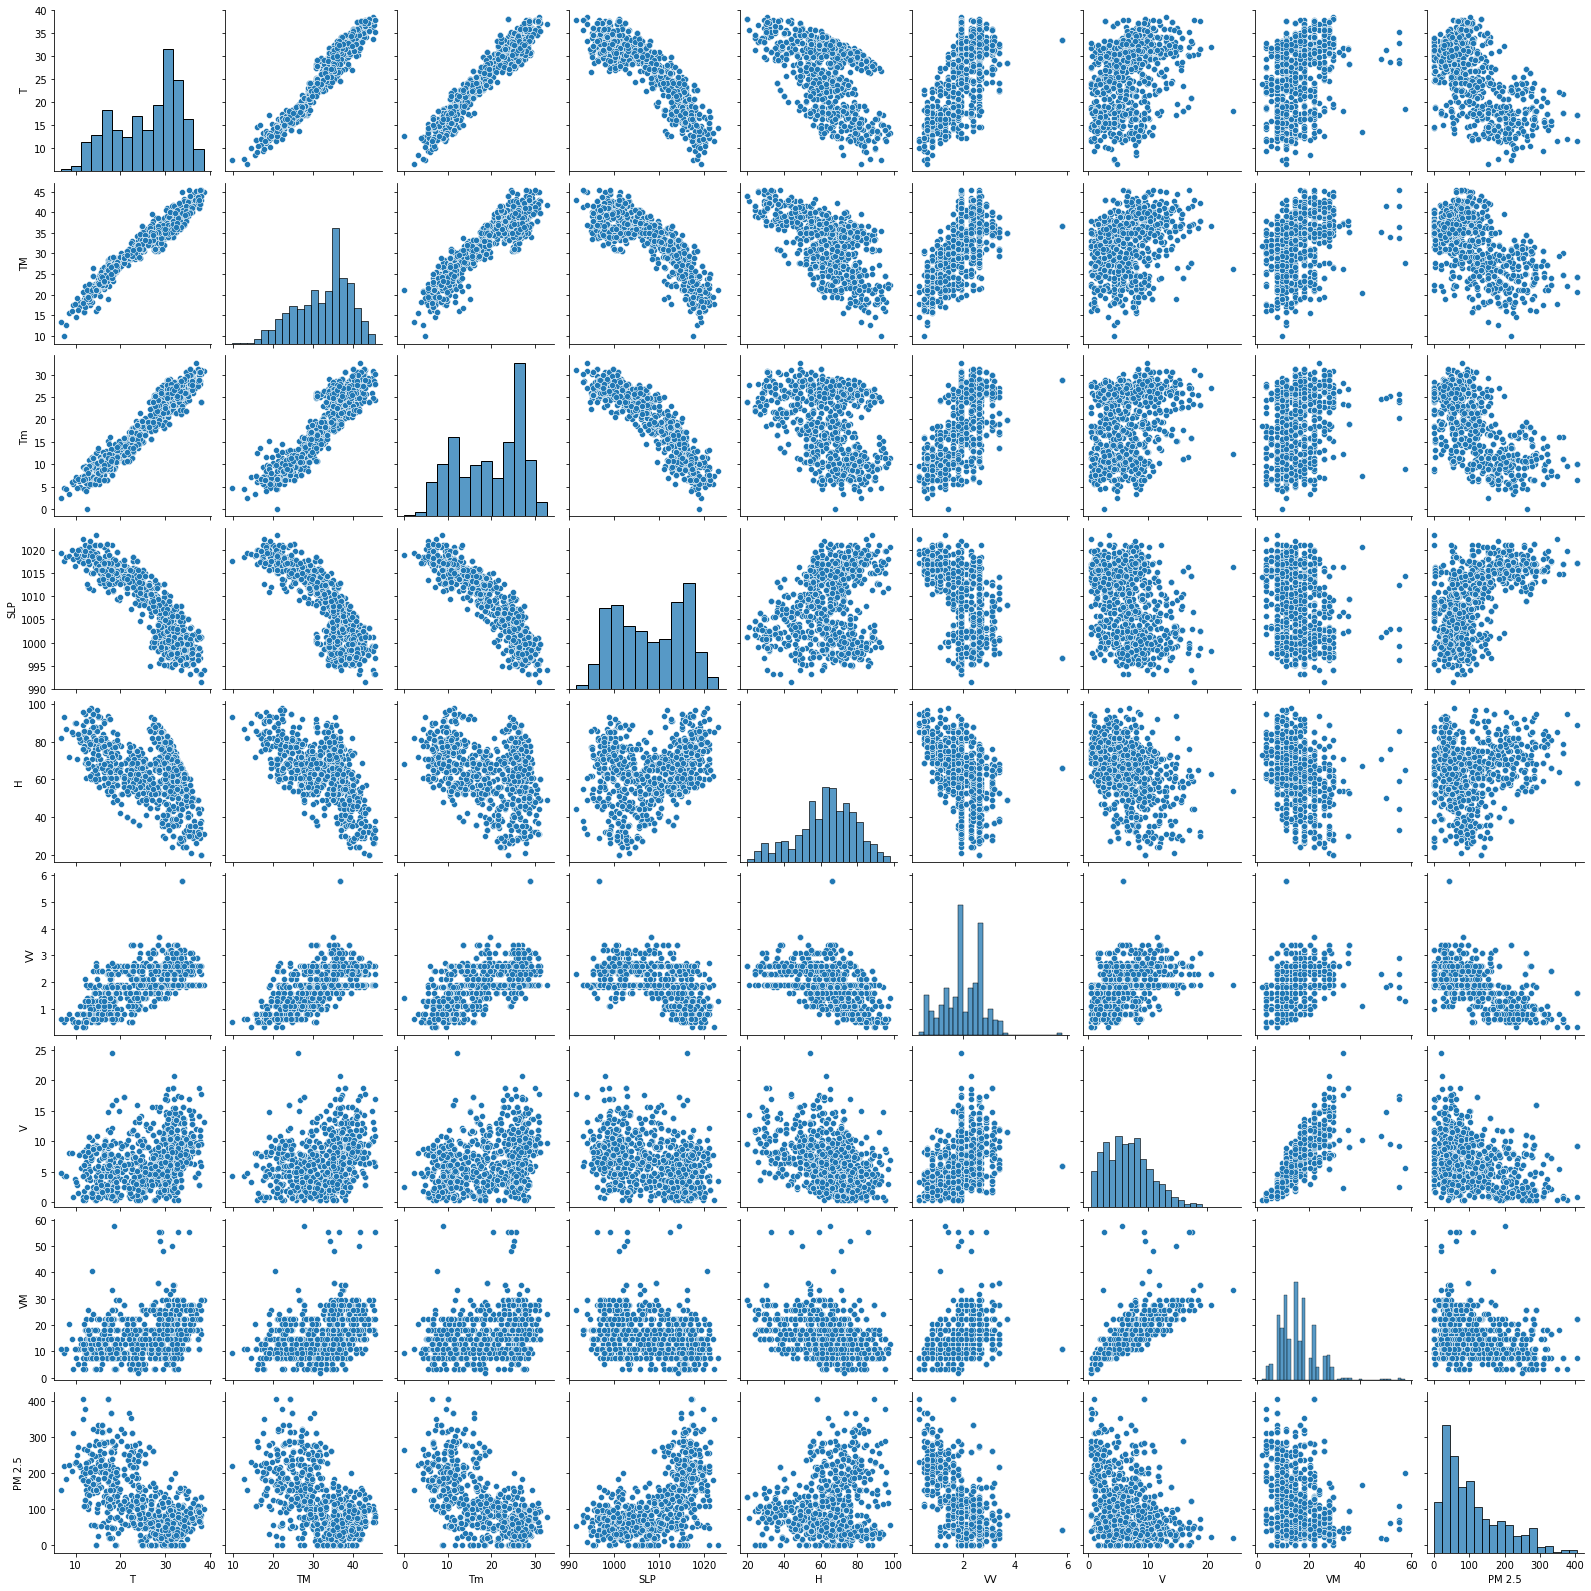

In [8]:
#Plot Scatter Pairs plot of data set
sns.pairplot(df)

### **Multicollinearity Analysis**

In [9]:
# fit a OLS model 

import statsmodels.api as sm
model= sm.OLS(df.iloc[:,-1], sm.add_constant(df.iloc[:,:-1])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 PM 2.5   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     155.1
Date:                Sun, 02 May 2021   Prob (F-statistic):          1.26e-173
Time:                        17:09:33   Log-Likelihood:                -5976.7
No. Observations:                1092   AIC:                         1.197e+04
Df Residuals:                    1083   BIC:                         1.202e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        311.4955    651.919      0.478      0.6

Here, we can see the standard error of each feature has smaller value also if 0lwe look p-value there three feature has a probability greater than 0.05 but I simply ignore multicollinearity because we have R squared value greater than 50%.

 **Correlation Analysis**

In [10]:
#Chech correlation Values
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
TM,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Tm,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
SLP,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
H,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
VV,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
V,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
VM,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


### **Correlation heatmap**

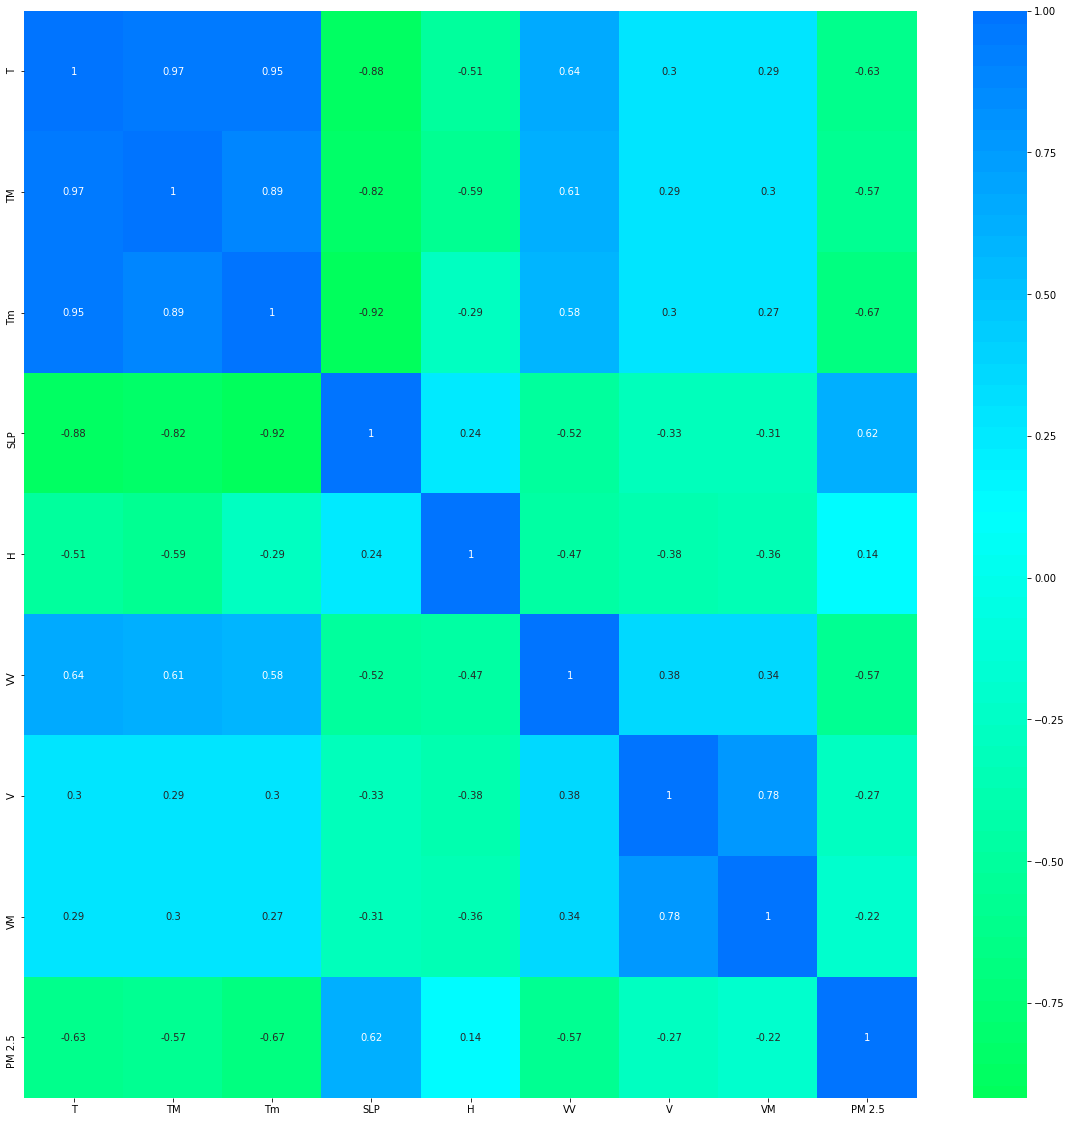

In [11]:

import seaborn as sns
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
from matplotlib import cm
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
hsv_modified = cm.get_cmap('hsv',256) 
newcmp = ListedColormap(hsv_modified(np.linspace(0.4, 0.6, 256)))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap=newcmp)


### **Features Analysis**

**Define ploting function**

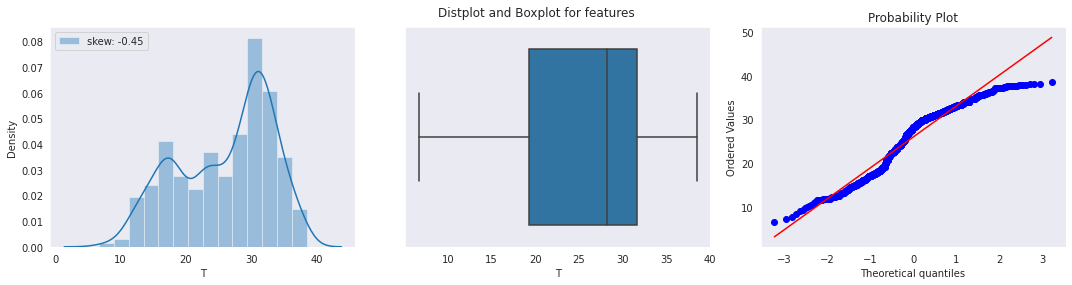

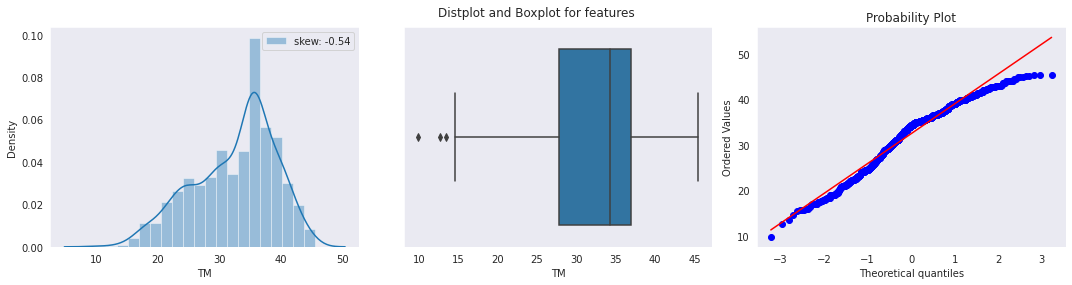

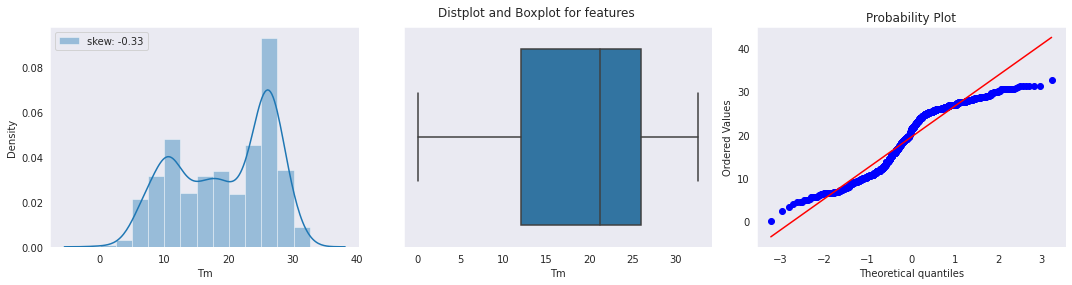

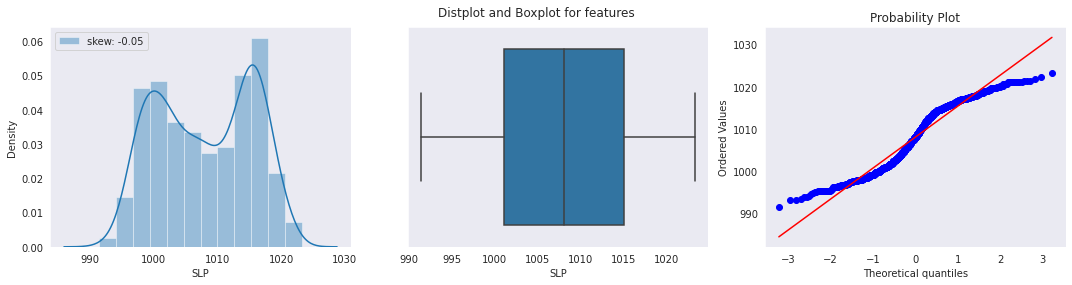

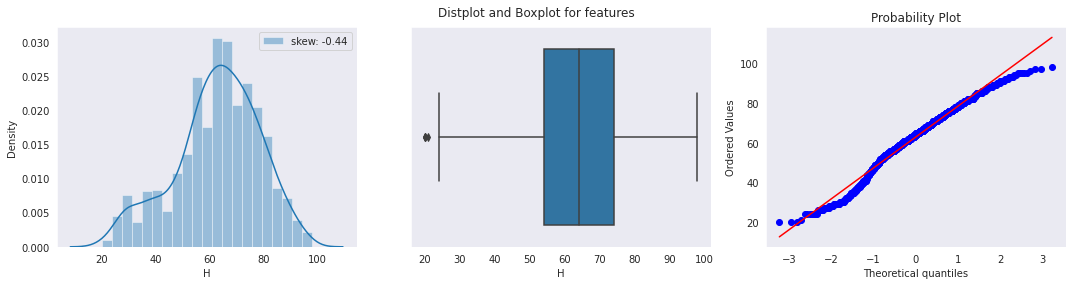

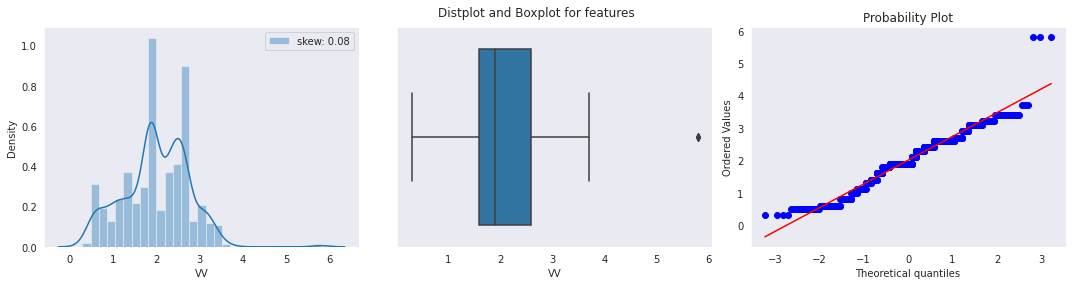

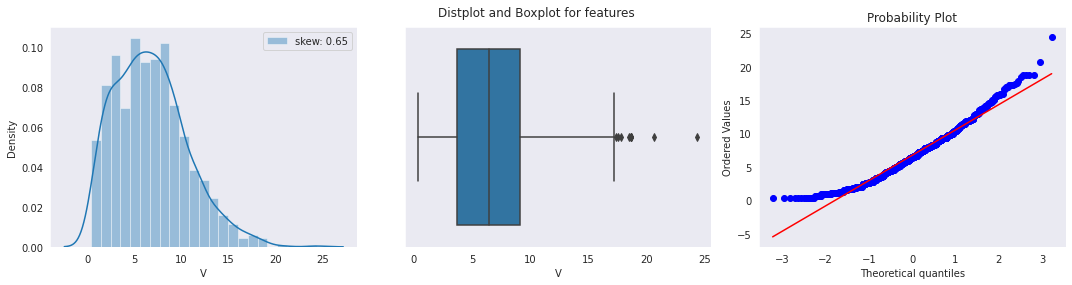

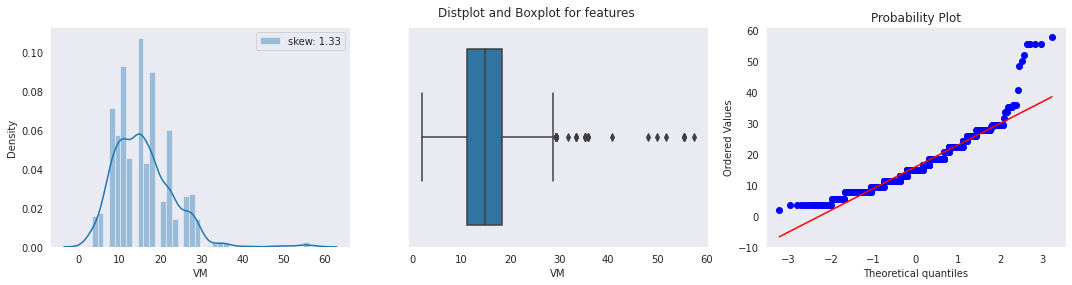

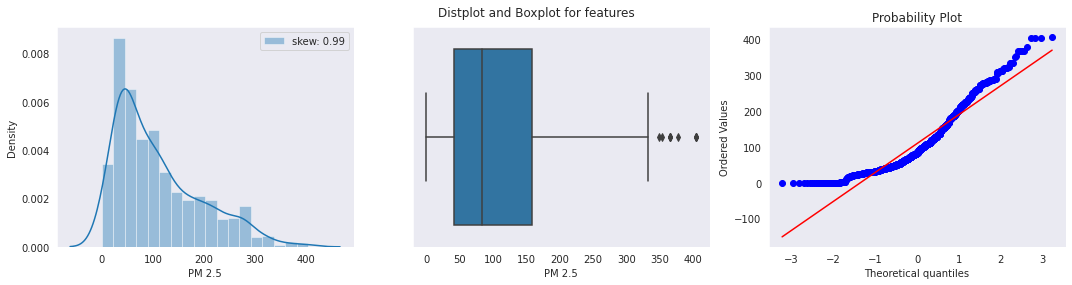

In [12]:
from scipy import stats
features=df.columns
sns.set_style('dark')
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.suptitle("Distplot and Boxplot for features")
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()
    plt.show()

**So, By visualizing the box plot we could see some of the features have outliers. which are "TM","H","W","V","VM" and "PM 2.5". So, we have to very carefully deal with outliers.**

### **Capping using Percentile method (Winsorization )**

In [13]:
new_df=df.copy()

In [14]:
def percentile_capping(df, cols, from_low_end, from_high_end):
    
    for col in cols:
        stats.mstats.winsorize(a=df[col], limits=(from_low_end, from_high_end), inplace=True)

In [15]:
# fourth argument of 0.01 from right end is equivalent to saying
# 1-0.01 = 0.99 quantile from the left end
percentile_capping(new_df, features, 0.01, 0.01)

In [16]:
new_df.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000
mean,26.034249,32.501099,19.476374,1008.077106,62.891026,1.996795,6.735714,15.676374,108.802484
std,7.190863,6.606756,7.401534,7.490763,15.625956,0.721084,3.785142,6.750778,83.564274
min,10.800000,16.300000,5.200000,995.100000,24.000000,0.500000,0.400000,3.500000,0.000000
25%,19.300000,27.800000,12.100000,1001.100000,54.000000,1.600000,3.700000,11.100000,41.833333
50%,28.200000,34.250000,21.200000,1008.050000,64.000000,1.900000,6.500000,14.800000,83.458333
75%,31.700000,37.000000,26.000000,1015.000000,74.000000,2.600000,9.100000,18.300000,158.291667
max,37.700000,44.000000,30.700000,1021.000000,94.000000,3.400000,17.200000,35.900000,349.291667


### **Comparison of outliers before and after removing the outliers**

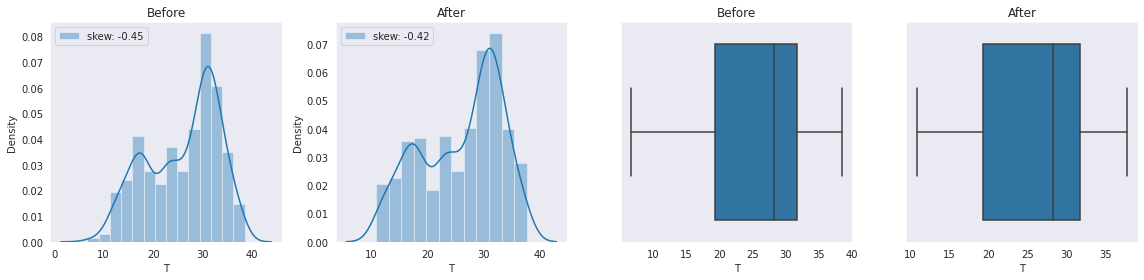

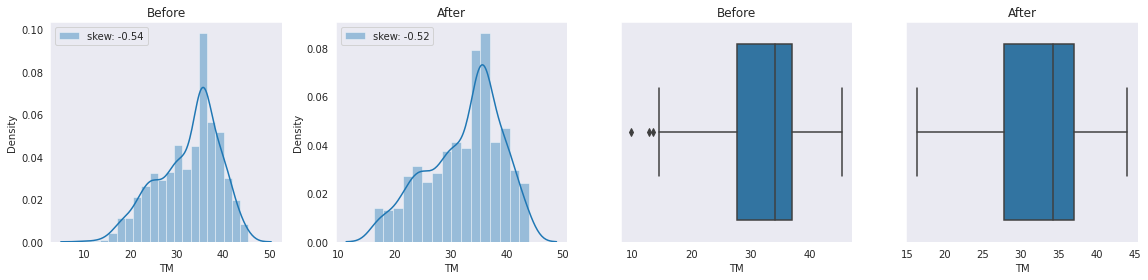

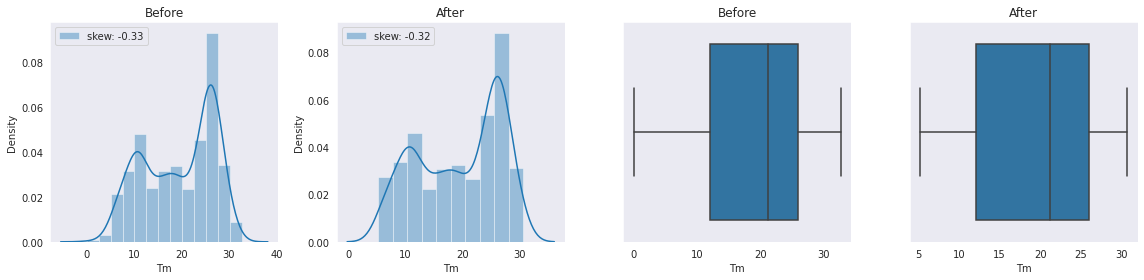

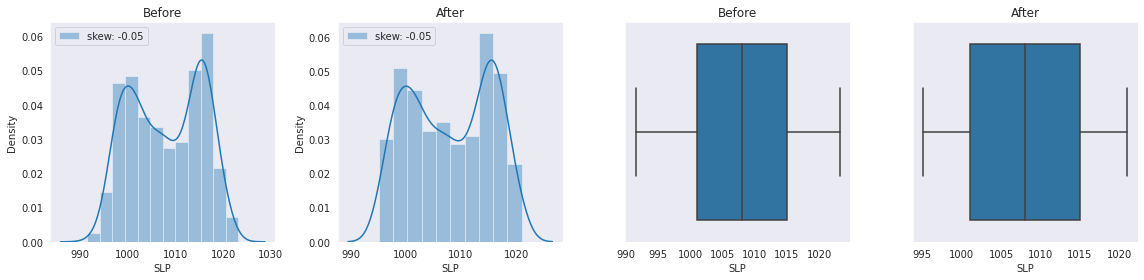

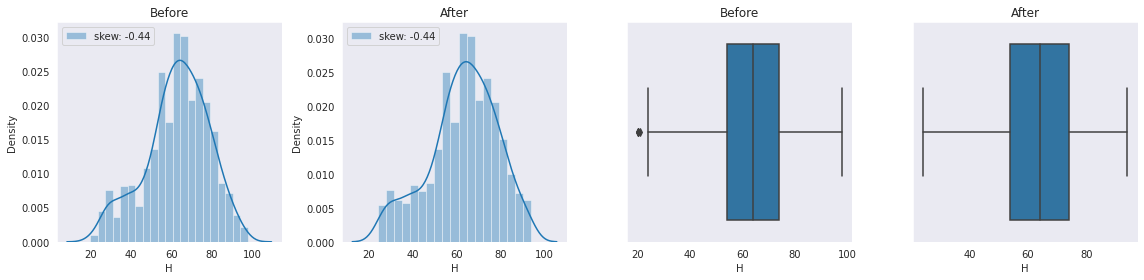

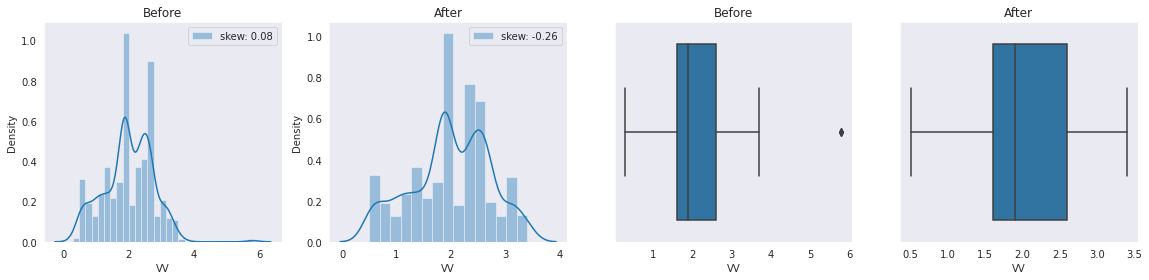

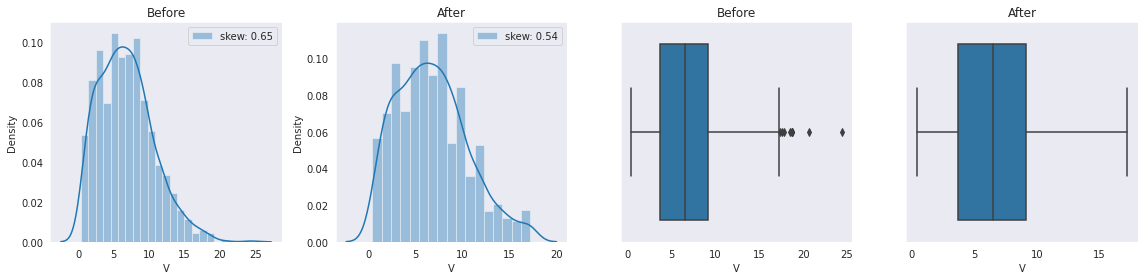

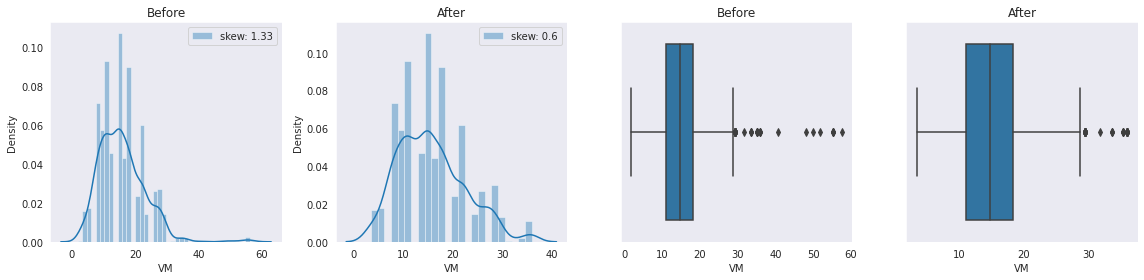

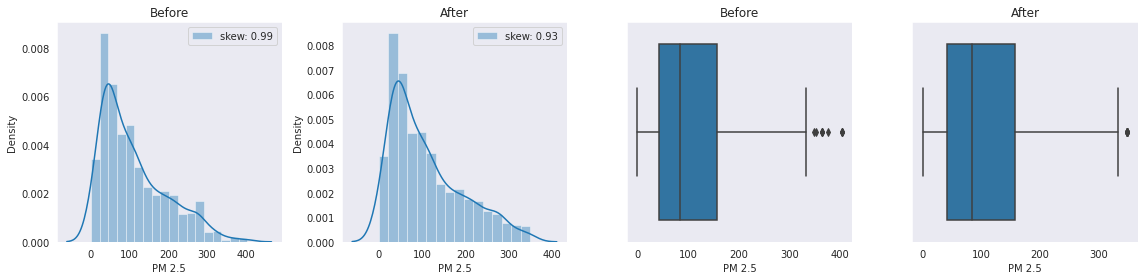

In [17]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(new_df[col], label="skew: " + str(np.round(new_df[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(new_df[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

Here, we could see after using the "winsorization" method how was changed the outliers. Also, we can see after handling outliers VM and PM 2.5 features are still have some outliers. but we don't need to do a second performance for dealing with outliers because It will generate new outliers again and again.

In [18]:
df=new_df.copy()

### **Feature Importances**

In [19]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
model = ExtraTreesRegressor()
model.fit(X,y)
print("Model Important values"+str(model.feature_importances_))

Model Important values[0.17229454 0.10482308 0.22827276 0.1264488  0.08879024 0.18481275
 0.05104263 0.04351521]


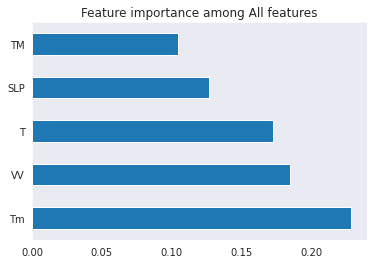

In [20]:
#plot graph of feature importances for better visualization
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(5).plot(kind='barh')
plt.title("Feature importance among All features")
plt.show()

#### By visualizing feature importance value,  we could see which feature most contributing to predict the AQI. 

In [ ]:
import pickle
# open a file, where you want to store the data
file = open('df_cleaned_data.pkl', 'wb')

# dump information to that file
pickle.dump(df, file)

### Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

### **Linear Regression Model**

In [22]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
print("Regression coeficent of all independent variable"+str(regressor.coef_))

Regression coeficent of all independent variable[ -1.77561496   0.90970293  -4.30303144   0.41423743  -1.11402666
 -43.78140634  -1.88691322   0.58221791]


**R Squred value of Train and Test data**

In [23]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.5452535222531911
Coefficient of determination R^2 <-- on test set: 0.5439884136067281


In [24]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)
print(score.mean())

0.48331624723886957


In [25]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)
print('Intercept:', regressor.intercept_)

     Coefficient
T      -1.775615
TM      0.909703
Tm     -4.303031
SLP     0.414237
H      -1.114027
VV    -43.781406
V      -1.886913
VM      0.582218
Intercept: -47.76350425879785


### **Regression Evaluation Metrics**

In [26]:
from sklearn import metrics
y_prediction=regressor.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

MAE: 43.60056698772739
MSE: 3358.9573129918163
RMSE: 57.95651225696571


In [27]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
def predicted_residual(actual,predicted):
  fig,ax = plt.subplots(1,2,figsize=(14,6))
  import scipy as sp
  _,(_,_,r)= sp.stats.probplot((actual-predicted),fit=True,plot=ax[0])
  ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

  #Check for Homoscedasticity
  sns.scatterplot(y = (actual-predicted), x= predicted, ax = ax[1],color='r') 
  plt.ylabel('Residual')
  plt.xlabel('Predicted')
  ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

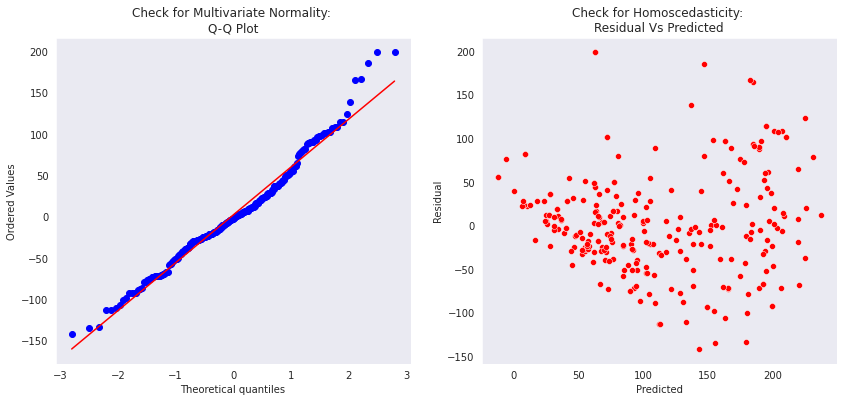

In [28]:
predicted_residual(y_test,y_prediction)

In [29]:
import pickle

#save the model
#regressor.save('/content/drive/My Drive/AQI_linear')
# open a file, where you ant to store the data
file = open('AQI_liner_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)

### **Ridge and Lasso Regression**

### **Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


In [ ]:
lasso=Lasso()
from sklearn.model_selection import RepeatedKFold
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=6, random_state=100)
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=cv)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-3226.4441882710867


In [ ]:
lasso=Lasso()
parameters={'alpha':[1e-2,1e-1,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,2.1,2.2,2.3,2.4,2.5,2.6]}
from sklearn.model_selection import RepeatedKFold
#parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=6, random_state=100)
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=cv)
lasso_regressor.fit(X,y)
print("Lasso regressor best alpha value is "+str(lasso_regressor.best_params_))
print("Lasso regressor best score value is"+str(lasso_regressor.best_score_))

Lasso regressor best alpha value is {'alpha': 0.1}
Lasso regressor best score value is-3226.1617961001607


### **Lasso Regressor Model Evaluation**

In [ ]:
prediction_lasso=lasso_regressor.predict(X_test)

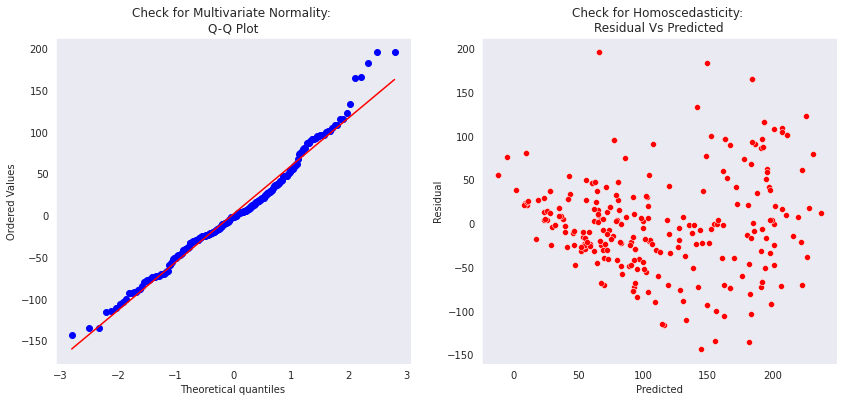

In [ ]:
predicted_residual(y_test,prediction_lasso)

### **Regression Evaluation Metric**

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_lasso))
print('MSE:', metrics.mean_squared_error(y_test, prediction_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_lasso)))

MAE: 43.50537218470877
MSE: 3335.4147056302113
RMSE: 57.75304931889061


### **Save Lasso-Trained Model**

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('lasso_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lasso_regressor, file)

In [ ]:
with open('/content/df.pkl','rb') as file:
    df= pickle.load(file)

In [ ]:
df

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,10.8,16.3,5.2,1017.6,93.0,0.5,4.3,9.4,219.720833
1,10.8,16.3,5.2,1018.5,87.0,0.6,4.4,11.1,182.187500
2,10.8,16.3,5.2,1019.4,82.0,0.6,4.8,11.1,154.037500
3,10.8,16.3,5.2,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,5.2,1017.3,61.0,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...
1088,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9,288.416667
1089,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2,256.833333
1090,13.9,24.5,11.4,1015.0,94.0,0.6,8.7,14.8,169.000000
1091,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667


### **Conclusion**
Linear regression model RMSE(Root Mean Square Error) is around 58 which is the same as  Lasso regressor accuracy. So, Here Lasso techniques not much contribute to reducing RMSE values  So, we have to try different regressor to getting low RMSE.
